**Plot Normal distribution**

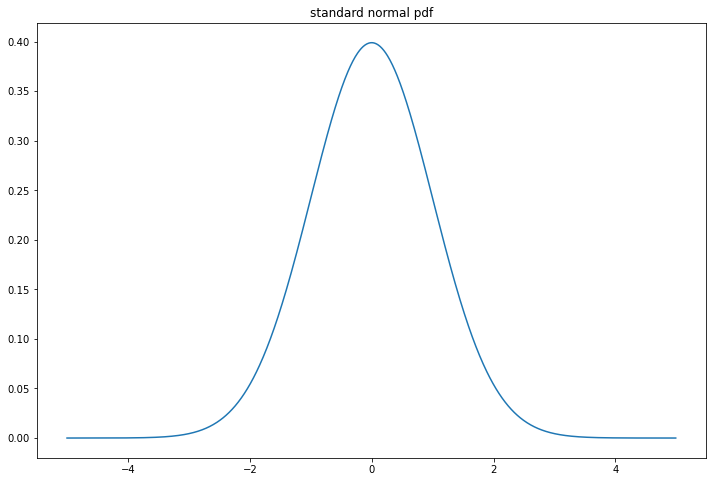

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

xx=np.arange(-5,5,step=0.01)

plt.figure(figsize=(12,8))
plt.plot(xx,norm.pdf(xx,loc=0,scale=1))
plt.title('standard normal pdf')
plt.show()

**Exercise 3.14.2**.  Let $X$ be such that $\mathbb{P}(X = 2) = \mathbb{P}(X = 3) = 1/10$ and $\mathbb{P}(X = 5) = 8/10$.  Plot the CDF $F$.  Use $F$ to find $\mathbb{P}(2 < X \leq 4.8)$ and $\mathbb{P}(2 \leq X \leq 4.8)$.

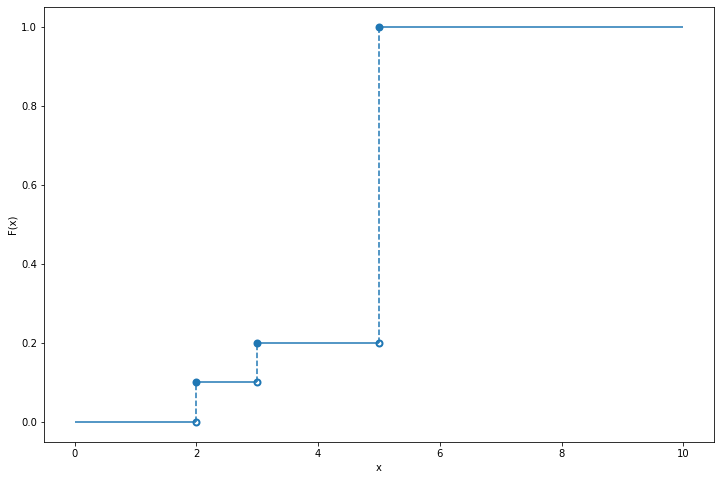

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))

#draw horizontal lines
for xmin, xmax, y in [(0,2,0),(2,3,0.1),(3,5,0.2),(5,10,1)]:
    plt.hlines(y,xmin,xmax,color='C0', linestyle='solid')
    
#draw vertical lines
for ymin, ymax, x in [(0,0.1,2),(0.1,0.2,3),(0.2,1,5)]:
    plt.vlines(x,ymin,ymax,color='C0',linestyle='dashed')
    
#mark open intervals
plt.scatter([2,3,5],[0,0.1,0.2], color='C0',facecolor='white',linewidth=2)
plt.scatter([2,3,5],[0.1,0.2,1], color='C0',facecolor='C0',linewidth=2)

plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()


**Exercise 3.14.4**.  Let $X$ have probability density function

$$ f_X(x) = \begin{cases}
1/4 &\text{if } 0 < x < 1 \\
3/8 &\text{if } 3 < x < 5 \\
0   &\text{otherwise}
\end{cases} $$

**(a)**  Find the cumulative distribution function of $X$.

**(b)**  Let $Y = 1 / X$.  Find the probability density function $f_Y(y)$ for $Y$.  Hint:  Consider three cases, $\frac{1}{5} \leq y \leq \frac{1}{3}$, $\frac{1}{3} \leq y \leq 1$, and $y \geq 1$.

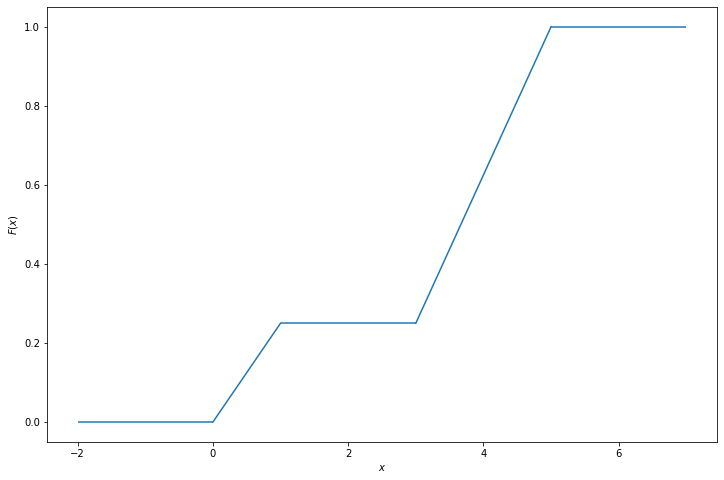

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))

#draw horizontal lines
for xmin, xmax, y in [(-2,0,0),(1,3,0.25),(5,7,1)]:
    plt.hlines(y,xmin,xmax,color='C0',linestyle='solid')
    
#draw diagonal lines
for x1,y1,x2,y2 in [(0,0,1,0.25),(3,0.25,5,1)]:
    plt.plot([x1,x2],[y1,y2],color='C0')

plt.xlabel(r'$x$')
plt.ylabel(r'$F(x)$')
plt.show()

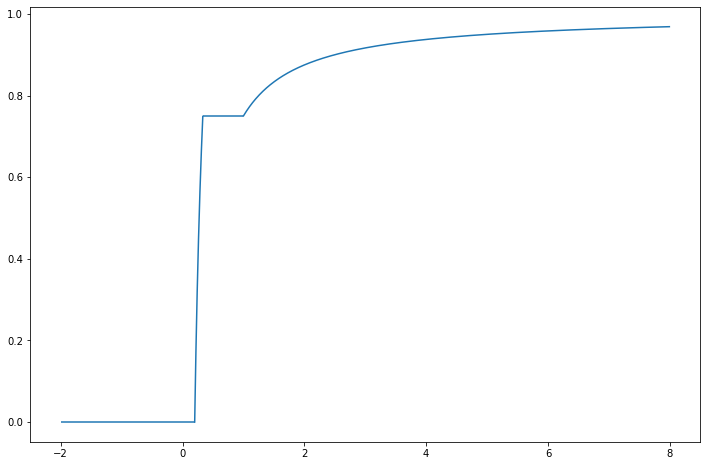

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))

#horizontal lines
for xmin, xmax, y in [(-2,0.2,0),(1/3,1,0.75)]:
    plt.hlines(y,xmin,xmax,color='C0')

#draw increasing segments
yy=np.arange(1/5,1/3,step=0.001)
plt.plot(yy,15/8-3/(8*yy),color='C0')

yy=np.arange(1,8, step=0.01)
plt.plot(yy,1-1/(4*yy),color='C0')

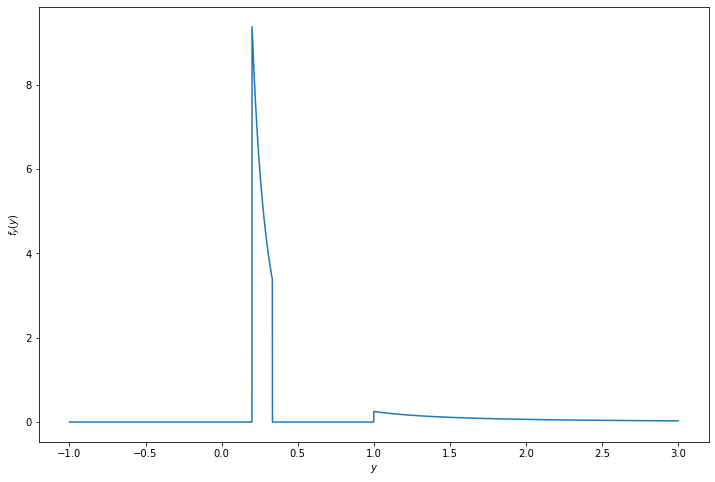

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f_y(y):
    return np.where(y<=1/5,0,np.where(y<=1/3,3/(8*(y**2)),np.where(y<=1,0,1/(4*(y**2)))))

plt.figure(figsize=(12,8))

yy=np.arange(-1,3,step=0.001)
plt.plot(yy,f_y(yy),color='C0')

plt.xlabel(r'$y$')
plt.ylabel(r'$f_y(y)$')
plt.show()

**Exercise 3.14.13**.  Let $X \sim N(0, 1)$ and let $Y = e^X$.

**(a)**  Find the PDF for $Y$.  Plot it.

**(b) (Computer Experiment)**  Generate a vector $x = (x_1, \dots, x_{10,000})$  consisting of 10,000 random standard Normals.  Let $y = (y_1, \dots, y_{10,000})$ where $y_i = e^{x_i}$.  Draw a histogram of $y$ and compare it to the PDF you found in part (a).

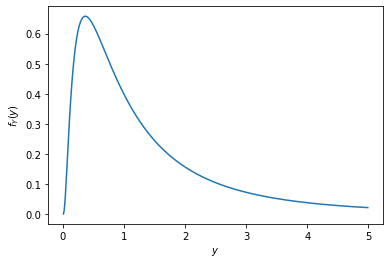

In [11]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline

yy=np.arange(0.01, 5, step=0.01)

def f_y(y):
    return np.where(y>0,norm.pdf(np.log(y))/y,0)

plt.plot(yy,f_y(yy))
plt.xlabel(r'$y$')
plt.ylabel(r'$f_Y(y)$')
plt.show()

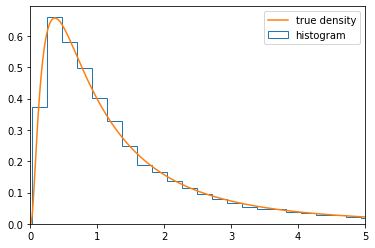

In [16]:
np.random.seed(0)

N=10000
X=norm.rvs(size=N)
Y=np.exp(X)

plt.hist(Y,bins=200,density=True, label='histogram', histtype='step')
plt.plot(yy, f_y(yy),label='true density')
plt.legend(loc='upper right')
plt.xlim(0,5)
plt.show()

**Exercise 3.14.15 (A universal random number generator)**.  Let $X$ have a continuous, strictly increasing CDF.  Let $Y = F(X)$.  Find the density of $Y$.  This is called the probability integral transformation.  Now let $U \sim \text{Uniform}(0, 1)$ and let $X = F^{-1}(U)$.  Show that $X \sim F$.  Now write a program that takes $\text{Uniform}(0, 1)$ random variables and generates random variables from a $\text{Exp}(\beta)$ distribution.

In [17]:
import numpy as np

def inv_F(beta):
    def inv_f_impl(q):
        return -beta*np.log(1-q)
    return inv_f_impl

In [22]:
np.random.seed(0)

N=100000
U=np.random.uniform(low=0,high=1,size=N)
X={}
for beta in [0.1,1,10]:
    X[beta]=inv_F(beta)(U)

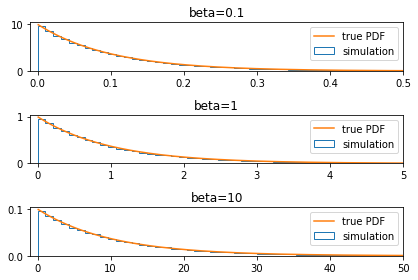

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import expon

for i, beta in enumerate([0.1,1,10]):
    ax=plt.subplot(3,1,i+1)
    ax.hist(X[beta],density=True, bins=100,histtype='step',label='simulation')
    xx=np.arange(beta*0.01, 5*beta, step=beta*0.01)
    ax.plot(xx,expon.pdf(xx,scale=beta),label='true PDF')
    ax.set_xlim(-beta*0.1,5*beta)
    ax.legend(loc='upper right')
    ax.set_title('beta='+str(beta))
    
plt.tight_layout()
plt.show()

**Exercie 3.14.18**.  Let $X \sim N(3, 16)$.  Solve the following using the Normal table and using a computer package.

**(a)** Find $\mathbb{P}(X < 7)$.

**(b)** Find $\mathbb{P}(X > -2)$.

**(c)** Find $x$ such that $\mathbb{P}(X > x) = .05$.

**(d)** Find $\mathbb{P}(0 \leq X < 4)$.

**(e)** Find $x$ such that $\mathbb{P}(|X| > |x|) = .05$.

In [24]:
import numpy as np
from scipy.stats import norm

print('%.4f' % norm.cdf(1))
print('%.4f' % norm.cdf(7,loc=3,scale=4))

0.8413
0.8413


In [26]:
print('%.4f' % (1-norm.cdf(-5/4)))
print('%.4f' % (1-norm.cdf(-2, loc=3, scale=4)))

0.8944
0.8944


In [28]:
print('%.4f' % norm.ppf(0.95, loc=3, scale=4))
print('%.4f' % (4*norm.ppf(0.95)+3))

9.5794
9.5794


In [29]:
print('%.4f' % (norm.cdf(1/4)-norm.cdf(-3/4)))
print('%.4f' % (norm.cdf(4,loc=3,scale=4)-norm.cdf(0,loc=3,scale=4)))

0.3721
0.3721


In [30]:
print('%.4f' % (norm.ppf(0.975,loc=3, scale=4)))
print('%.4f' % (4*norm.ppf(0.975)+3))

10.8399
10.8399


**Exercise 3.14.20**.  Let $X, Y \sim \text{Uniform}(0, 1)$ be independent.  Find the PDF for $X - Y$ and $X / Y$.

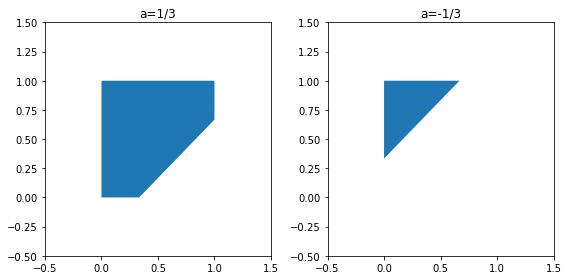

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 4))

ax=plt.subplot(1,2,1)
a=1/3
x=[0,a,1,1,0]
y=[0,0,1-a,1,1]
ax.fill(x,y)
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_title('a=1/3')

ax=plt.subplot(1,2,2)
a=-1/3
x=[0,1+a,0]
y=[1,1,-a]
ax.fill(x,y)
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_title('a=-1/3')

plt.tight_layout()
plt.show()

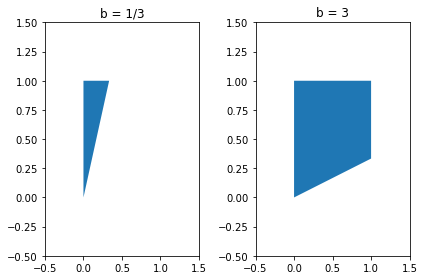

In [41]:
ax = plt.subplot(1, 2, 1)
b = 1/3
x = [0, b, 0]
y = [0, 1, 1]
ax.fill(x, y)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_title('b = 1/3')

ax = plt.subplot(1, 2, 2)
b = 3
x = [0, 1, 1, 0]
y = [0, 1/b, 1, 1]
ax.fill(x, y)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_title('b = 3')

plt.tight_layout()
plt.show()